**Import Libraries**

In [411]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.svm import SVR
import pandas as pd
import numpy as np

url = "https://raw.githubusercontent.com/Adn02/Intro-to-ML/main/Datasets/Housing.csv"
hf = pd.read_csv(url)
hf.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


**Pre-processing**

In [412]:
variable_list = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

def binary_mapping(x):
  return x.map({'no' : 0, 'yes' : 1})

hf[variable_list] = hf[variable_list].apply(binary_mapping)
hf = hf.drop('furnishingstatus', axis=1)

x = StandardScaler().fit_transform(hf)
y = hf.pop('price')

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, test_size = 0.2, random_state = 0)
hf.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
0,7420,4,2,3,1,0,0,0,1,2,1
1,8960,4,4,4,1,0,0,0,1,3,0
2,9960,3,2,2,1,0,1,0,0,2,1
3,7500,4,2,2,1,0,1,0,1,3,1
4,7420,4,1,2,1,1,1,0,1,2,0


**Linear SVR without PCA**

In [413]:
classifier = SVR(kernel='linear')
classifier.fit(x_train, y_train)

y_pred = classifier.predict(x_test)

**Plotting**

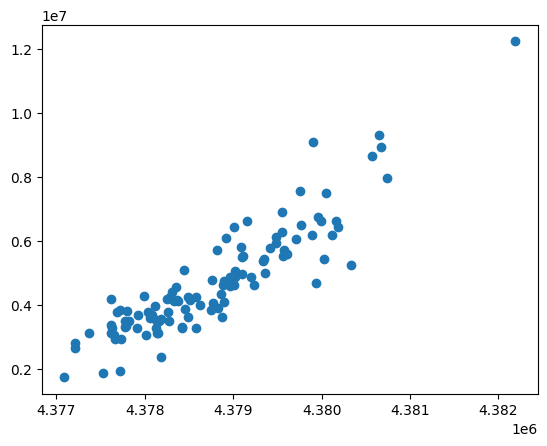

In [414]:
plt.scatter(y_pred, y_test)

In [415]:
def svm_train(x, y, kern, K):
  accuracies = []
  accuracy = 0
  low = float('inf')

  for N in K:
    pca = PCA(n_components=N)
    principalDf = pd.DataFrame(pca.fit_transform(x))
    newX = principalDf.values

    x_train, x_test, y_train, y_test = train_test_split(newX, y, train_size=0.8, test_size=0.2, random_state=0)

    if kern == 'linear':
            classifier = SVR(kernel=kern, C=1)
    elif kern == 'poly':
            classifier = SVR(kernel=kern, degree=2, C=1)
    else:
            classifier = SVR(kernel=kern, C=1, gamma='scale')

    classifier.fit(x_train, y_train)

    y_pred = classifier.predict(x_test)

    accuracy = mean_squared_error(y_test, y_pred)
    accuracies.append(accuracy)

    if accuracy < low:
      low = accuracy
      optimal_k = N

  return accuracies, low, optimal_k

Linear Kernal Accurcies [2035880430382.9578, 2035486354671.663, 2035478171396.2285, 2035488965531.5217, 2035430597469.1099, 2035427065709.2222, 2035428448010.047, 2035424780908.5808, 2035423653527.3203, 2035421831509.1892, 2035421838460.0503] 
Optimal K: 10 
Lowest Error:  2035421831509.1892

RBF Kernal Accurcies [3000141079406.065, 3000141079434.8936, 3000141079461.471, 3000141079484.738, 3000141079483.4204, 3000141079498.18, 3000141079505.54, 3000141079511.6426, 3000141079517.2905, 3000141079523.151, 3000141079524.779] 
Optimal K: 1 
Lowest Error:  3000141079406.065

Poly Kernal Accurcies [3000092063188.6616, 3000092063313.093, 3000092063381.5625, 3000092063421.8135, 3000092063447.6714, 3000092063465.7783, 3000092063482.235, 3000092063494.308, 3000092063501.2954, 3000092063510.227, 3000092063514.388] 
Optimal K: 1 
Lowest Error:  3000092063188.6616


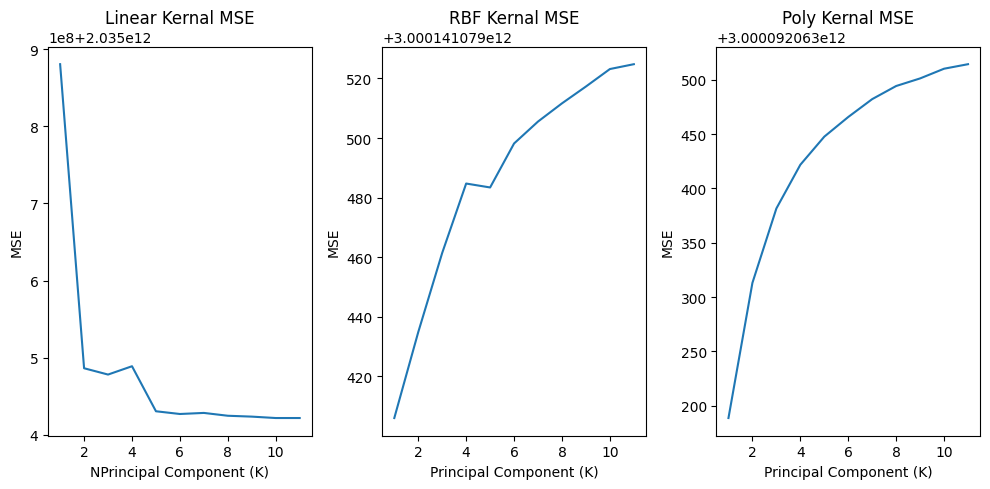

In [416]:
k = range(1, x.shape[1])
lin_accuracies, lin_low, lin_K = svm_train(hf, y, 'linear', k)
rbf_accuracies, rbf_low, rbf_K = svm_train(hf, y, 'rbf', k)
poly_accuracies, poly_low, poly_K = svm_train(hf, y, 'poly', k)


print('Linear Kernal Accurcies', lin_accuracies, '\nOptimal K:', lin_K, '\nLowest Error: ', lin_low)
print('\nRBF Kernal Accurcies', rbf_accuracies, '\nOptimal K:', rbf_K, '\nLowest Error: ', rbf_low)
print('\nPoly Kernal Accurcies', poly_accuracies, '\nOptimal K:', poly_K, '\nLowest Error: ', poly_low)

plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.plot(k, lin_accuracies)
plt.title('Linear Kernal MSE')
plt.xlabel('NPrincipal Component (K)')
plt.ylabel('MSE')

plt.subplot(1, 3, 2)
plt.plot(k, rbf_accuracies )
plt.title('RBF Kernal MSE')
plt.xlabel('Principal Component (K)')
plt.ylabel('MSE')

plt.subplot(1, 3, 3)
plt.plot(k, poly_accuracies)
plt.title('Poly Kernal MSE')
plt.xlabel('Principal Component (K)')
plt.ylabel('MSE')

plt.tight_layout()
plt.show()